In [ ]:
# https://www.youtube.com/watch?v=D9HjlqIrB-c

In [2]:
from matplotlib.pyplot import imshow
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

In [3]:
np.random.seed(42)

SIZE=256
img_data=[]


In [4]:
img=cv2.imread('/content/monalisa.jpg', 1)   #Change 1 to 0 for grey images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Changing BGR to RGB to show images in true colors
img=cv2.resize(img,(SIZE, SIZE))
img_data.append(img_to_array(img))

img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array = img_array.astype('float32') / 255. #değerleri 0 - 1 arasına normalize ettik

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 8)        0

Epoch 1/500
1/1 [==============================] - 0s 211ms/step - loss: 0.0016 - accuracy: 0.9056
Epoch 2/500
1/1 [==============================] - 0s 220ms/step - loss: 0.0016 - accuracy: 0.9055
Epoch 3/500
1/1 [==============================] - 0s 230ms/step - loss: 0.0016 - accuracy: 0.9055
Epoch 4/500
1/1 [==============================] - 0s 240ms/step - loss: 0.0016 - accuracy: 0.9059
Epoch 5/500
1/1 [==============================] - 0s 223ms/step - loss: 0.0016 - accuracy: 0.9055
Epoch 6/500
1/1 [==============================] - 0s 224ms/step - loss: 0.0016 - accuracy: 0.9060
Epoch 7/500
1/1 [==============================] - 0s 232ms/step - loss: 0.0016 - accuracy: 0.9055
Epoch 8/500
1/1 [==============================] - 0s 241ms/step - loss: 0.0016 - accuracy: 0.9057
Epoch 9/500
1/1 [==============================] - 0s 225ms/step - loss: 0.0016 - accuracy: 0.9056
Epoch 10/500
1/1 [==============================] - 0s 232ms/step - loss: 0.0016 - accuracy: 0.9059
Epoch 11/

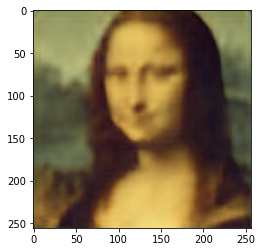

In [8]:
model.fit(img_array, img_array,
        epochs=500,
        shuffle=True)


print("Neural network output")
pred = model.predict(img_array)



imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")